In [1]:
import pandas as pd
import re
import os
import glob

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils
import subprocess


In [3]:
from pybedtools import BedTool
def intersect_bed_files(bed_file1, bed_file2):
    bed1 = BedTool(bed_file1).sort()
    bed2 = BedTool(bed_file2).sort()

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping

def intersect_bed_objects(bed_file1, bed_file2):
    bed1 = bed_file1.sort()
    bed2 = bed_file2.sort()

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping


In [4]:
df_dar= pd.read_csv('/data2st1/junyi/output/atac0526/dar/region_nt/mementob_dar_noccur.csv')

In [5]:
df_dar.head()   

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,...,gstart,gend,strand,annotation_x,distance,de_pval_adj,primary_region,secondary_region,darct,n_celltype
0,chr2:98662628-98663129,stim,0.297648,0.040250,1.275518e-13,-0.126407,0.107848,0.234857,Immune,PFC,...,98662236,98664083,+,genebody,0,3.038415e-12,exon,LINE,PFC_Glut/PFC_GABA,2.0
1,chrX:143482812-143483313,stim,0.367096,0.049646,1.308574e-13,0.010504,0.125507,0.992527,Immune,PFC,...,143518590,143797796,+,genebody,35278,3.114843e-12,distal,LINE,PFC_Glut/PFC_GABA,2.0
2,chr6:103648949-103649450,stim,0.297753,0.040198,1.474284e-13,-0.144116,0.094564,0.110749,Immune,PFC,...,103510585,103750211,+,genebody,0,3.496496e-12,intron,LINE,PFC_Glut/PFC_GABA,2.0
3,chr2:98662045-98662546,stim,0.314090,0.042905,2.253055e-13,-0.469675,0.251926,0.074096,Immune,PFC,...,98662236,98664083,+,genebody,0,5.274371e-12,exon,repeat,PFC_Glut/PFC_GABA,2.0
4,chr12:20815539-20816040,stim,0.679751,0.098147,5.078591e-12,-0.045391,0.226588,0.728508,Immune,PFC,...,20804380,20815779,-,genebody,0,1.072659e-10,exon,cpg,NaN,NaN


In [6]:
# out_dir ='/data2st1/junyi/output/atac0526/dar/GWAS'
# for ct in df_dar['ctname'].unique():
#     for condition in df_dar['condition'].unique():
#         df_sub = df_dar[(df_dar['ctname'] == ct) & (df_dar['condition'] == condition)]
#         if len(df_sub) == 0:
#             continue
#         df_bed = df_sub["names"].str.split(r'[:-]', expand=True)#.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)
#         df_bed.columns = ['chr', 'start', 'end']
#         df_bed['oid'] = df_sub.index
#         df_bed.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)

In [7]:
# import subprocess
# files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*.bed')
# for filename in files:
#     experimentname = re.split(r'[./]', filename)[-2]
#     folder_name = os.path.dirname(filename)

#     #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

#     command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm10ToHg19.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
#     print(command_str)
#     subprocess.run(command_str, shell=True)

In [8]:
# gwas_files = glob.glob('/data1st2/junyi/data/ssf/*formatted.tsv.gz')

# for filename in gwas_files:
#     experimentname = re.split(r'[./]', filename)[5]
#     df_gwas = pd.read_csv(filename, sep='\t', compression='gzip')
#     df_gwas_selected = df_gwas[df_gwas.p_value<5e-8].loc[:, ['chromosome', 'base_pair_location','rsid']]
#     df_gwas_selected['chromosome'] = 'chr' + df_gwas_selected['chromosome'].astype(str)
#     df_gwas_selected['end'] = df_gwas_selected['base_pair_location']
#     df_gwas_selected['rsid'] = df_gwas_selected['rsid']
#     df_gwas_selected = df_gwas_selected.loc[:, ['chromosome', 'base_pair_location', 'end', 'rsid']]
#     df_gwas_selected.to_csv(f'/data2st1/junyi/output/atac0526/dar/GWAS/{experimentname}_5e8.bed', sep='\t', header=False, index=False)

In [9]:
gwas_beds = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*5e8.bed')
lifted_files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*_lifted.bed')
df_snp_all = pd.DataFrame(columns=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas', 'experiment', 'gwas'])
for gwas_bed in ['/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted_5e8.bed']:
    for lifted_file in lifted_files:
        experimentname = re.split(r'[./]', lifted_file)[-2]
        merged, non_overlapping = intersect_bed_files(lifted_file, gwas_bed)

        df_merged = merged.to_dataframe(names=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas','rsid'])
        #df_merged.loc[:,['start','end','start_gwas','end_gwas']] = df_merged.loc[:,['start','end','start_gwas','end_gwas']].astype(int)
        df_merged['experiment'] = experimentname
        
        df_merged['gwas'] = os.path.basename(gwas_bed)

        df_snp_all = pd.concat([df_snp_all, df_merged], ignore_index=True)

In [10]:
df_gwas= pd.read_csv('/data1st2/junyi/data/ssf/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted.tsv.gz',sep='\t', compression='gzip')

In [11]:
df_gwas['-log10(P-value)'] = -np.log10(df_gwas['p_value'])

In [12]:
df_snp_all_sorted = df_snp_all.sort_values(by='start').sort_values(
    by='chr',
    key=lambda x: x.str.replace('chr','').astype(int)
)

In [13]:
df_snp_all_sorted = df_snp_all_sorted.merge(df_gwas[['rsid', '-log10(P-value)']], left_on='rsid', right_on='rsid', how='left').sort_values('-log10(P-value)',ascending=False)

In [14]:
#df_snp_all_sorted.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted_1e5_lifted_intersected.csv')

In [15]:
df_dar_gwas = df_dar.iloc[df_snp_all_sorted.oid]

In [16]:
df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
df_dar_gwas['rsid'] = df_snp_all_sorted['rsid'].values
df_dar_gwas['-log10p_gwas'] = df_snp_all_sorted['-log10(P-value)'].values
df_dar_gwas['gwas_data'] = df_snp_all_sorted['gwas'].values

/tmp/ipykernel_2552179/3479497382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
/tmp/ipykernel_2552179/3479497382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
/tmp/ipykernel_2552179/3479497382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [17]:
df_dar_gwas.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted_5e8_result.csv', index=False)

In [75]:
df_gwas

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,rsid,info,effect_allele_frequency_cases,n,ncases,ncontrols,heterogeneity_i2,heterogeneity_df,heterogeneity_p_value,-log10(P-value)
0,1,752566,G,A,0.002796,0.0047,0.1790,0.5535,rs3094315,0.843,0.1770,927713.52,341197,989052,39.1,12,0.07303,0.256882
1,1,752721,A,G,0.002696,0.0048,0.1810,0.5773,rs3131972,0.829,0.1800,934966.92,343527,1004757,33.4,15,0.09513,0.238598
2,1,753541,A,G,0.002696,0.0048,0.1500,0.5712,rs2073813,0.880,0.1470,1014821.72,364797,1341816,27.5,17,0.13490,0.243212
3,1,754182,A,G,0.002796,0.0048,0.1500,0.5677,rs3131969,0.882,0.1480,1014821.72,364797,1341816,24.8,17,0.16270,0.245881
4,1,754192,A,G,0.002796,0.0048,0.1500,0.5680,rs3131968,0.882,0.1480,1014821.72,364797,1341816,24.6,17,0.16490,0.245652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363297,23,154923311,T,C,-0.005998,0.0085,0.0617,0.4786,rs141127553,1.120,0.0610,474175.68,150714,924399,0.0,5,0.68110,0.320027
7363298,23,154923374,A,T,0.011098,0.0101,0.0461,0.2706,rs111332691,1.120,0.0426,416531.80,124759,880817,0.0,4,0.46370,0.567672
7363299,23,154925045,T,C,0.006698,0.0045,0.2430,0.1420,rs509981,1.160,0.2420,474983.72,151216,924644,0.0,5,0.68050,0.847712
7363300,23,154927581,A,G,0.004500,0.0043,0.3050,0.2993,rs644138,1.150,0.3040,475132.62,151263,924823,0.0,5,0.79170,0.523893


In [18]:
df = df_gwas.sort_values(["chromosome", "base_pair_location"])   # Sort by chromosome and position
df["index"] = range(len(df))           # Add index for x-axis


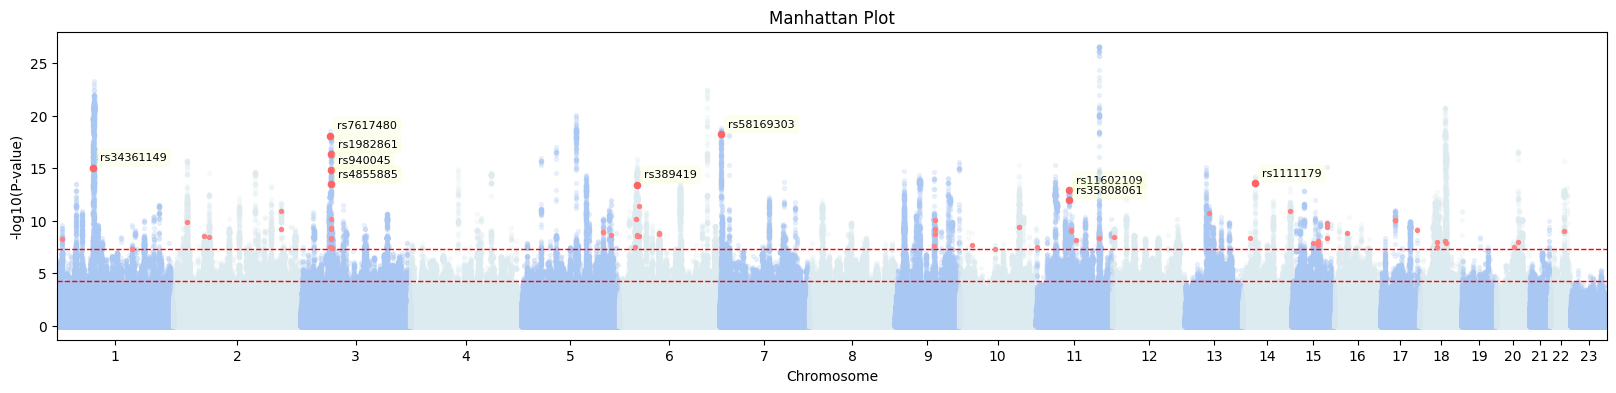

In [19]:
highlight_ids = list(set(df_snp_all_sorted.drop_duplicates(['rsid']).head(10)['rsid'].values))  # Replace with your SNP IDs
overlap_ids = list(set(df_snp_all_sorted['rsid'].values))

def plot_manhattan(df,highlight_ids=None,overlap_ids =None):
    plt.figure(figsize=(20, 4))
    colors = ["#DBEBF0", "#A9C7F3"]  # Alternating colors
    for chrom, group in df.groupby("chromosome"):
        color = colors[chrom % 2]     # Alternate colors
        plt.scatter(group["index"], group["-log10(P-value)"], color=color, s=8, alpha=0.2)

    # Add significance threshold
    plt.axhline(y=-np.log10(5e-8), color="r", linestyle="--", linewidth=1)
    plt.axhline(y=-np.log10(5e-5), color="r", linestyle="--", linewidth=1)


    highlight_df = df[df["rsid"].isin(highlight_ids)]

    if not (overlap_ids is None):
        overlap_df = df[df["rsid"].isin(overlap_ids)]

        # print("No overlapping SNPs found.")
        # overlap_df = pd.DataFrame(columns=df.columns)
        plt.scatter(
            overlap_df["index"], 
            overlap_df["-log10(P-value)"], 
            color="#FF8282",          # Fill color
        # marker="*",           # Star-shaped marker
            s=8,                # Size
            #edgecolors="black",   # Bold border
            #linewidths=1.5,       # Border thickness
            zorder=3              # Ensure points appear on top
        )
    plt.scatter(
        highlight_df["index"], 
        highlight_df["-log10(P-value)"], 
        color="#FF6363",          # Fill color
    # marker="*",           # Star-shaped marker
        s=20,                # Size
        #edgecolors="black",   # Bold border
        #linewidths=1.5,       # Border thickness
        zorder=3              # Ensure points appear on top
    )

    for _, row in highlight_df.iterrows():
        plt.annotate(
            row["rsid"],                          # SNP ID as text
            xy=(row["index"], row["-log10(P-value)"]),  # Coordinates of the point
            xytext=(5, 5),                        # Offset from the point (in points)
            textcoords="offset points",           # Coordinate system for xytext
            fontsize=8,
            bbox=dict(boxstyle="round", alpha=0.2, color="#F1FFB5"),  # Optional background
            zorder=4                              # Ensure labels appear above points
        )


    plt.xlabel("Chromosome")
    plt.ylabel("-log10(P-value)")
    plt.title("Manhattan Plot")

    # Customize x-axis ticks (optional)
    chrom_df = df.groupby("chromosome")["index"].median()
    plt.xticks(chrom_df, chrom_df.index)
    plt.xlim(0, len(df))
    plt.show()

plot_manhattan(df, highlight_ids=highlight_ids, overlap_ids=overlap_ids)


In [20]:
# gwas_beds = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*5e8.bed')
gender = 'M'
df_dms_all = pd.DataFrame(columns=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas', 'experiment', 'gwas'])

all_dmrs = pd.DataFrame()
for region in ['AMY', 'PFC', 'HIP']:
    file_df_dmrs = glob.glob(f'/data1st2/hannan_25/data/Nanopore_process/nanopore_08_differential/modkit_fineg/pair_base/C*_{gender}C*{region}_C*.bed*p005')
    lifted_files = glob.glob(f'/data2st1/junyi/output/atac0526/dar/GWAS/*{region}*inner.bed')
    for gwas_bed in file_df_dmrs:
        df_dmr = pd.read_csv(gwas_bed, sep='\t')
        motif = gwas_bed.split('_')[-1][:2]
        # remove chr not in 1-22, X, Y
        df_dmr = df_dmr[df_dmr['#chrom'].astype(str).str.match(r'[0-9XY]')]
        #df_dmr['rsid'] = 'rs'+df_dmr.index.astype(str)
        df_dmr['-log10(P-value)'] = -np.log10(df_dmr['balanced_map_pvalue'])
        df_dmr['chr'] = 'chr' + df_dmr['#chrom'].astype(str)
        df_dmr['chromosome'] = df_dmr['#chrom']
        df_dmr['chromosome'] = df_dmr['chromosome'].astype(str).replace({'X': '23', 'Y': '23'}).astype(int)
        df_dmr['base_pair_location'] = df_dmr['end'].astype(int)
        #bed_dmr = df_dmr[['chr','end','end']]
        df_dmr['motif'] = motif
        df_dmr['gwas'] = f'MC-{region}_vs_MW-{region}_{motif}.bed.p005'
        all_dmrs = pd.concat([all_dmrs, df_dmr], ignore_index=True)
      

/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dmr = pd.read_csv(gwas_bed, sep='\t')
/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dmr = pd.read_csv(gwas_bed, sep='\t')
/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dmr = pd.read_csv(gwas_bed, sep='\t')
/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dmr = pd.read_csv(gwas_bed, sep='\t')
/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dmr = pd.read_csv(gwas_bed, sep='\t')
/tmp/ipykernel_2552179/780354341.py:10: DtypeWarning: Columns (0) have mixed types. S

In [21]:
  # create bedobject from dataframe
all_dmrs['rsid'] = all_dmrs.index.astype(int)
bed_dmr = BedTool.from_dataframe(all_dmrs[['chr','end','end','rsid']])

In [22]:
all_dar = df_dar.names.str.split(r'[:-]', expand=True)

In [23]:
all_dar['oid'] = df_dar.index
bed_dar = BedTool.from_dataframe(all_dar)

In [24]:

# #read bed file for lifted regions
# lifted_bed = BedTool(lifted_file).sort()
# bed_dmr = bed_dmr.sort()

# experimentname = re.split(r'[./]', lifted_file)[-2]
merged_dms, non_overlapping = intersect_bed_objects(bed_dar, bed_dmr)
df_merged_dms = merged_dms.to_dataframe(names=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas','rsid'])


In [68]:
df_dar

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,...,gstart,gend,strand,annotation_x,distance,de_pval_adj,primary_region,secondary_region,darct,n_celltype
0,chr2:98662628-98663129,stim,0.297648,0.040250,1.275518e-13,-0.126407,0.107848,0.234857,Immune,PFC,...,98662236,98664083,+,genebody,0,3.038415e-12,exon,LINE,PFC_Glut/PFC_GABA,2.0
1,chrX:143482812-143483313,stim,0.367096,0.049646,1.308574e-13,0.010504,0.125507,0.992527,Immune,PFC,...,143518590,143797796,+,genebody,35278,3.114843e-12,distal,LINE,PFC_Glut/PFC_GABA,2.0
2,chr6:103648949-103649450,stim,0.297753,0.040198,1.474284e-13,-0.144116,0.094564,0.110749,Immune,PFC,...,103510585,103750211,+,genebody,0,3.496496e-12,intron,LINE,PFC_Glut/PFC_GABA,2.0
3,chr2:98662045-98662546,stim,0.314090,0.042905,2.253055e-13,-0.469675,0.251926,0.074096,Immune,PFC,...,98662236,98664083,+,genebody,0,5.274371e-12,exon,repeat,PFC_Glut/PFC_GABA,2.0
4,chr12:20815539-20816040,stim,0.679751,0.098147,5.078591e-12,-0.045391,0.226588,0.728508,Immune,PFC,...,20804380,20815779,-,genebody,0,1.072659e-10,exon,cpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166087,chr13:98316774-98317275,stim,-0.093560,0.047568,4.964940e-02,0.077941,0.208111,0.741855,AMY_GABA,AMY,...,98316421,98324415,+,genebody,0,1.344347e-01,promoter,cpg,PFC_Glut/AMY_GABA/AMY_Glut,3.0
166088,chr7:80688678-80689179,stim,-0.104519,0.053277,4.972339e-02,-0.302131,0.229897,0.191148,AMY_GABA,AMY,...,80586626,80688877,-,genebody,0,1.345883e-01,promoter,cpg,PFC_Glut/AMY_GABA,2.0
166089,chr17:66123319-66123820,stim,-0.100798,0.053496,4.980623e-02,0.086841,0.205283,0.619451,AMY_GABA,AMY,...,66123519,66152174,+,genebody,0,1.347595e-01,UTR,cpg,PFC_Glut/AMY_GABA/AMY_Glut,3.0
166090,chr5:57716510-57717011,stim,-0.139860,0.070286,4.997954e-02,-0.236434,0.346212,0.444463,AMY_GABA,AMY,...,57570081,57720201,-,genebody,0,1.351111e-01,exon,NaN,PFC_Glut/AMY_GABA/AMY_Glut,3.0


In [69]:
#df_merged['gwas'] = 
df_merged_dms['-log10(P-value)'] = all_dmrs.iloc[df_merged_dms.rsid.astype(int)]['-log10(P-value)'].values
df_merged_dms['motif'] = all_dmrs.iloc[df_merged_dms.rsid.astype(int)]['motif'].values
df_merged_dms['gwas'] = all_dmrs.iloc[df_merged_dms.rsid.astype(int)]['gwas'].values
df_merged_dms['ctname'] = df_dar.iloc[df_merged_dms.oid]['ctname'].values
df_merged_dms['condition'] = df_dar.iloc[df_merged_dms.oid]['condition'].values
df_merged_dms['primary_region'] = df_dar.iloc[df_merged_dms.oid]['primary_region'].values
df_merged_dms['secondary_region'] = df_dar.iloc[df_merged_dms.oid]['secondary_region'].values
df_merged_dms['dmsname'] = df_merged_dms['chromosome'].astype(str) + ':' + df_merged_dms['start_gwas'].astype(str) + '-' + df_merged_dms['end_gwas'].astype(str)

<Axes: ylabel='counts'>

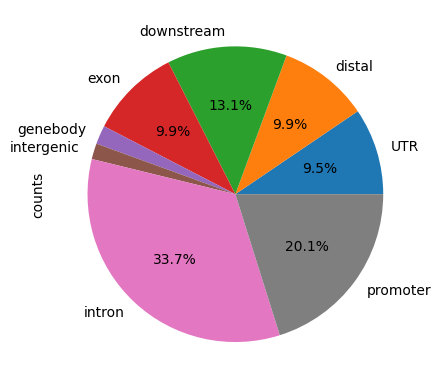

In [72]:
df_deg_region_c=df_merged_dms.groupby("primary_region").size().reset_index(name='counts')
df_deg_region_c.set_index('primary_region').plot.pie(
    y='counts',
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',
    legend=False
)

In [84]:
df_merged_dms

,chr,start,end,oid,chromosome,start_gwas,end_gwas,rsid,-log10(P-value),motif,gwas,ctname,condition,dmsname,primary_region,secondary_region,ctname_con
3531,chr1,88262579,88263080,157341,chr1,88262586,88262586,2279098,9.018919,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,AMY_Glut,MW,chr1:88262586-88262586,UTR,repeat,AMY_Glut_MW
88613,chr2,59841373,59841874,140811,chr2,59841569,59841569,2879675,7.673334,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,Immune,MC,chr2:59841569-59841569,exon,repeat,Immune_MC
88594,chr2,59841373,59841874,111196,chr2,59841569,59841569,2879675,7.673334,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,Immune,MC,chr2:59841569-59841569,exon,repeat,Immune_MC
78003,chr18,75819896,75820397,154521,chr18,75819994,75819994,2813128,7.294932,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,AMY_GABA,MC,chr18:75819994-75819994,UTR,cpg,AMY_GABA_MC
123958,chr5,129019841,129020342,28632,chr5,129020339,129020339,3155663,6.907337,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,OPC-Oligo,MW,chr5:129020339-129020339,promoter,cpg,OPC-Oligo_MW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164470,chr9,102594940,102595441,68202,chr9,102595114,102595114,4031845,1.301166,CG,MC-PFC_vs_MW-PFC_CG.bed.p005,PFC_Glut,MW,chr9:102595114-102595114,intron,SINE,PFC_Glut_MW
108279,chr4,107588995,107589496,163225,chr4,107589365,107589365,3853822,1.301143,CG,MC-PFC_vs_MW-PFC_CG.bed.p005,AMY_Glut,MW,chr4:107589365-107589365,intron,SINE,AMY_Glut_MW
21525,chr11,54317286,54317787,132599,chr11,54317541,54317541,4780389,1.301143,CG,MC-HIP_vs_MW-HIP_CG.bed.p005,HIP_Glut,MW,chr11:54317541-54317541,intron,LINE,HIP_Glut_MW
21523,chr11,54317286,54317787,44451,chr11,54317541,54317541,4780389,1.301143,CG,MC-HIP_vs_MW-HIP_CG.bed.p005,PFC_Glut,MW,chr11:54317541-54317541,intron,LINE,PFC_Glut_MW


In [85]:
all_dmrs.head()

,#chrom,start,end,name,score,strand,a_counts,a_total,b_counts,b_total,...,cohen_h_low,cohen_h_high,fdr,-log10(P-value),chr,chromosome,base_pair_location,motif,gwas,rsid
0,1,3003562,3003563,.,1.506149,+,"h:0,m:8",33,"h:0,m:1",22,...,0.060450,1.139375,1.0,1.375385,chr1,1,3003563,CH,MC-AMY_vs_MW-AMY_CH.bed.p005,0
1,1,3005206,3005207,.,1.197335,-,"h:2,m:3",35,"h:2,m:8",31,...,-0.050537,0.916260,1.0,1.411561,chr1,1,3005207,CH,MC-AMY_vs_MW-AMY_CH.bed.p005,1
2,1,3031571,3031572,.,3.190020,+,"h:0,m:4",6,"h:0,m:0",6,...,0.779048,3.042219,1.0,1.527593,chr1,1,3031572,CH,MC-AMY_vs_MW-AMY_CH.bed.p005,2
3,1,3031695,3031696,.,3.479273,-,"h:0,m:10",11,"h:0,m:1",5,...,0.544617,2.658869,1.0,1.692940,chr1,1,3031696,CH,MC-AMY_vs_MW-AMY_CH.bed.p005,3
4,1,3043938,3043939,.,2.353126,-,"h:0,m:1",15,"h:0,m:3",5,...,0.237718,2.261961,1.0,1.833633,chr1,1,3043939,CH,MC-AMY_vs_MW-AMY_CH.bed.p005,4


In [86]:
df_dar

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,...,gstart,gend,strand,annotation_x,distance,de_pval_adj,primary_region,secondary_region,darct,n_celltype
0,chr2:98662628-98663129,stim,0.297648,0.040250,1.275518e-13,-0.126407,0.107848,0.234857,Immune,PFC,...,98662236,98664083,+,genebody,0,3.038415e-12,exon,LINE,PFC_Glut/PFC_GABA,2.0
1,chrX:143482812-143483313,stim,0.367096,0.049646,1.308574e-13,0.010504,0.125507,0.992527,Immune,PFC,...,143518590,143797796,+,genebody,35278,3.114843e-12,distal,LINE,PFC_Glut/PFC_GABA,2.0
2,chr6:103648949-103649450,stim,0.297753,0.040198,1.474284e-13,-0.144116,0.094564,0.110749,Immune,PFC,...,103510585,103750211,+,genebody,0,3.496496e-12,intron,LINE,PFC_Glut/PFC_GABA,2.0
3,chr2:98662045-98662546,stim,0.314090,0.042905,2.253055e-13,-0.469675,0.251926,0.074096,Immune,PFC,...,98662236,98664083,+,genebody,0,5.274371e-12,exon,repeat,PFC_Glut/PFC_GABA,2.0
4,chr12:20815539-20816040,stim,0.679751,0.098147,5.078591e-12,-0.045391,0.226588,0.728508,Immune,PFC,...,20804380,20815779,-,genebody,0,1.072659e-10,exon,cpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166087,chr13:98316774-98317275,stim,-0.093560,0.047568,4.964940e-02,0.077941,0.208111,0.741855,AMY_GABA,AMY,...,98316421,98324415,+,genebody,0,1.344347e-01,promoter,cpg,PFC_Glut/AMY_GABA/AMY_Glut,3.0
166088,chr7:80688678-80689179,stim,-0.104519,0.053277,4.972339e-02,-0.302131,0.229897,0.191148,AMY_GABA,AMY,...,80586626,80688877,-,genebody,0,1.345883e-01,promoter,cpg,PFC_Glut/AMY_GABA,2.0
166089,chr17:66123319-66123820,stim,-0.100798,0.053496,4.980623e-02,0.086841,0.205283,0.619451,AMY_GABA,AMY,...,66123519,66152174,+,genebody,0,1.347595e-01,UTR,cpg,PFC_Glut/AMY_GABA/AMY_Glut,3.0
166090,chr5:57716510-57717011,stim,-0.139860,0.070286,4.997954e-02,-0.236434,0.346212,0.444463,AMY_GABA,AMY,...,57570081,57720201,-,genebody,0,1.351111e-01,exon,NaN,PFC_Glut/AMY_GABA/AMY_Glut,3.0


In [ ]:
from matplotlib_venn import venn2
df1 = df_dar.names
df2 = all_dmrs.dmsname
set1 = set(df1.gene)
set2 = set(df2.gene)
venn_labels = {'10': len(set1 - set2), '01': len(set2 - set1), '11': len(set1 & set2)}
plt.figure(figsize=(4, 4))
venn2(subsets=venn_labels, set_labels=(title1, title2), alpha=0.5, set_colors=('blue', 'coral'))
plt.title(f'Venn Diagram: {title1} vs {title2}')
plt.show()
draw_venn(df_memento_cr, df_deg_select, 'Memento CR', 'DEGs')


,chr,start,end,oid,chromosome,start_gwas,end_gwas,rsid,-log10(P-value),motif,gwas,ctname,condition,dmsname,primary_region,secondary_region
3531,chr1,88262579,88263080,157341,chr1,88262586,88262586,2279098,9.018919,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,AMY_Glut,MW,chr1:88262586-88262586,UTR,repeat
88613,chr2,59841373,59841874,140811,chr2,59841569,59841569,2879675,7.673334,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,Immune,MC,chr2:59841569-59841569,exon,repeat
88594,chr2,59841373,59841874,111196,chr2,59841569,59841569,2879675,7.673334,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,Immune,MC,chr2:59841569-59841569,exon,repeat
78003,chr18,75819896,75820397,154521,chr18,75819994,75819994,2813128,7.294932,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,AMY_GABA,MC,chr18:75819994-75819994,UTR,cpg
123958,chr5,129019841,129020342,28632,chr5,129020339,129020339,3155663,6.907337,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,OPC-Oligo,MW,chr5:129020339-129020339,promoter,cpg


/tmp/ipykernel_2552179/2141238643.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='ctname_con', ylabel='Proportion (%)'>)

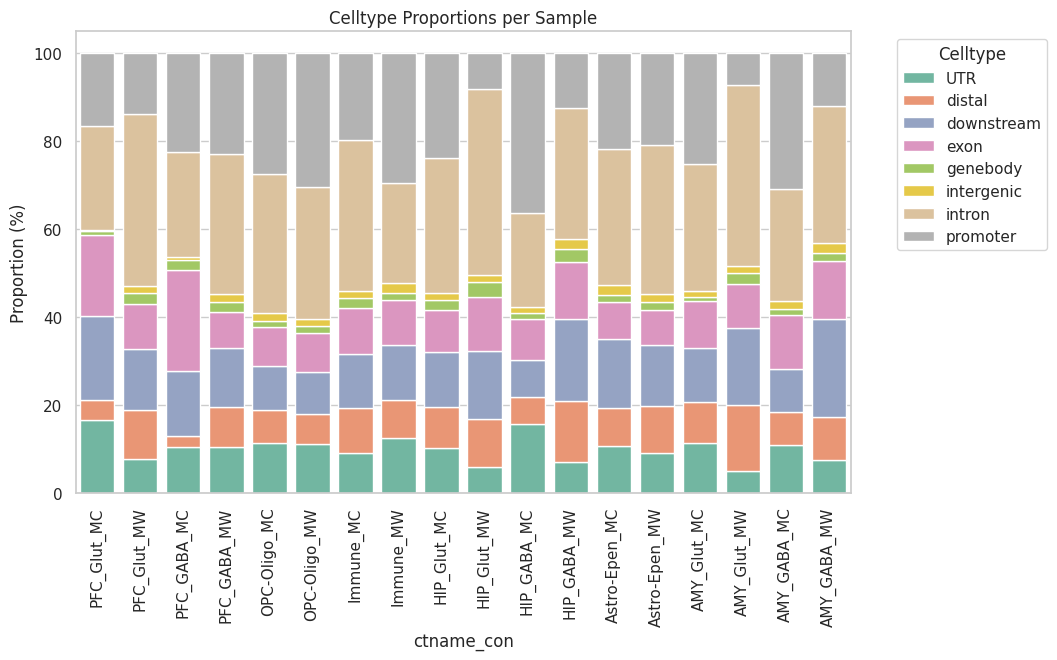

In [78]:
def plot_stack_prop(df,x=None, y='proportion',pro_col='celltype.L1',color_palette=sns.color_palette("Set2"), figsize=(10, 6),x_order=None, **kwargs):
    counts = df.groupby([x, pro_col]).size().unstack(fill_value=0)
    # If x_order is provided, sort the index of counts
    if x_order is not None:
        counts = counts.loc[x_order]
    df_prop = counts.div(counts.sum(axis=1), axis=0) * 100
    df_prop = df_prop.reset_index().melt(id_vars=x, var_name=pro_col, value_name=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(style="whitegrid")
    # Initialize bottom positions for stacking
        # Sort the dataframe by the specified order by the column of sample name
    bottom = pd.Series([0] * len(df_prop[x].unique()), index=df_prop[x].unique())
    # Plot each celltype layer
    for i, celltype in enumerate(df_prop[pro_col].unique()):
        subset = df_prop[df_prop[pro_col] == celltype]
        sns.barplot(
            x=x, y=y, data=subset,
            label=celltype, bottom=bottom[subset[x]],
            color=color_palette[i]
        )
        bottom += subset.set_index(x)[y].reindex(bottom.index, fill_value=0)
    ax.set_title('Celltype Proportions per Sample')
    ax.set_ylabel('Proportion (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(title='Celltype', bbox_to_anchor=(1.05, 1))
    return fig,ax

#order = meta_atac.sort_values('Region')['sample'].unique()
df_merged_dms['ctname_con'] = df_merged_dms['ctname'] + "_" + df_merged_dms['condition'].astype(str)
order = df_merged_dms.sort_values(by=['ctname','condition'],ascending=[False,True]).drop_duplicates(['ctname_con'])['ctname_con'].to_list()
plot_stack_prop(df_merged_dms,x='ctname_con', y='proportion',pro_col="primary_region",x_order=order, figsize=(10, 6))

/tmp/ipykernel_2552179/2141238643.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='ctname_con', ylabel='Proportion (%)'>)

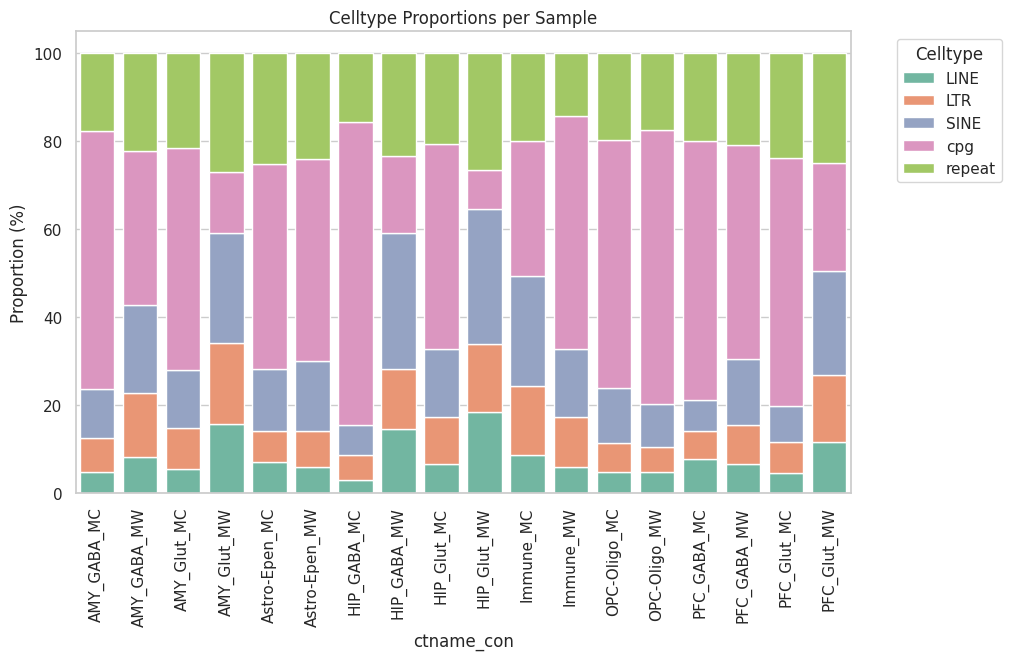

In [83]:
plot_stack_prop(df_merged_dms,x='ctname_con', y='proportion',pro_col="secondary_region", figsize=(10, 6))

<Axes: ylabel='counts'>

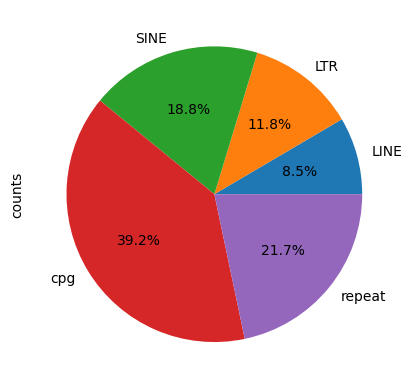

In [73]:
df_deg_region_c=df_merged_dms.groupby("secondary_region").size().reset_index(name='counts')
df_deg_region_c.set_index('secondary_region').plot.pie(
    y='counts',
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',
    legend=False
)

In [27]:
heatmap = pd.crosstab(df_merged_dms['ctname'], df_merged_dms['gwas'],values=df_merged_dms['dmsname'], aggfunc='count')


In [28]:
order = ['AMY_GABA','AMY_Glut','HIP_GABA','HIP_Glut','PFC_GABA','PFC_Glut']

In [29]:
heatmap= heatmap.loc[order]

In [53]:
ctname_count = df_dar.groupby(['ctname']).nunique()['names'].reset_index()
ctname_count.set_index('ctname', inplace=True)
ctname_count = ctname_count.loc[order]


In [ ]:
heatmap.div(ctname_count['names'], axis=0).astype(float).fillna(0)

gwas,MC-AMY_vs_MW-AMY_CG.bed.p005,MC-AMY_vs_MW-AMY_CH.bed.p005,MC-HIP_vs_MW-HIP_CG.bed.p005,MC-HIP_vs_MW-HIP_CH.bed.p005,MC-PFC_vs_MW-PFC_CG.bed.p005,MC-PFC_vs_MW-PFC_CH.bed.p005
ctname,,,,,,
AMY_GABA,0.182060,0.124434,0.128294,0.100346,0.147192,0.182859
AMY_Glut,0.279833,0.161895,0.226054,0.089098,0.237478,0.157924
HIP_GABA,0.116143,0.133543,0.088260,0.101887,0.101468,0.183019
HIP_Glut,0.200625,0.162438,0.158427,0.092368,0.162907,0.163115
PFC_GABA,0.182933,0.131811,0.140710,0.089390,0.155542,0.139326
PFC_Glut,0.256036,0.184350,0.210777,0.098782,0.217091,0.138144


<Axes: xlabel='gwas', ylabel='ctname'>

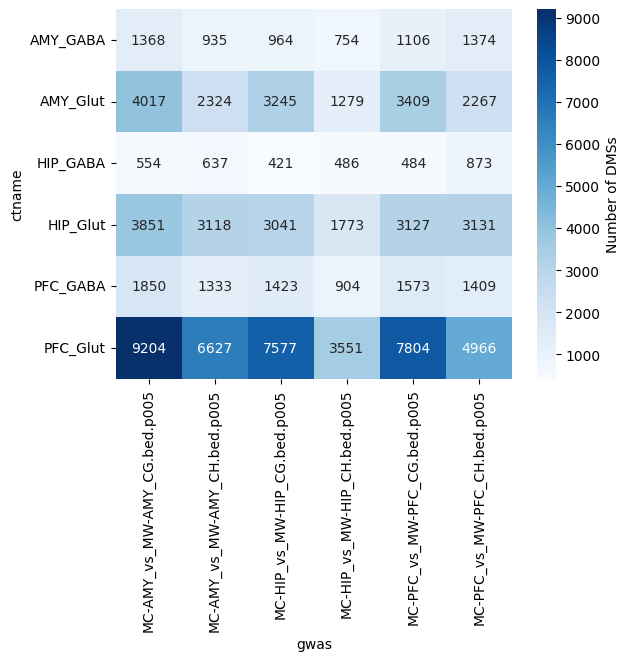

In [65]:
sns.heatmap(heatmap, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Number of DMSs'})

In [31]:
df_dms_all_sorted = all_dmrs.sort_values('-log10(P-value)',ascending=False)

In [32]:
df_merged_dms.sort_values('-log10(P-value)', ascending=False,inplace=True)

In [33]:
df_dms_all_sorted.head()

,#chrom,start,end,name,score,strand,a_counts,a_total,b_counts,b_total,...,cohen_h_low,cohen_h_high,fdr,-log10(P-value),chr,chromosome,base_pair_location,motif,gwas,rsid
3626133,14,11926576,11926577,.,46.003800,-,"h:0,m:0",36,"h:5,m:32",38,...,2.359861,3.271558,1.211770e-13,18.433513,chr14,14,11926577,CG,MC-PFC_vs_MW-PFC_CG.bed.p005,3626133
3827357,3,137397358,137397359,.,42.513894,-,"h:7,m:30",38,"h:0,m:2",42,...,1.936923,2.814544,1.909615e-12,18.172451,chr3,3,137397359,CG,MC-PFC_vs_MW-PFC_CG.bed.p005,3827357
3621931,13,109853197,109853198,.,44.538817,+,"h:0,m:0",46,"h:2,m:26",29,...,2.303304,3.232764,3.114936e-13,17.156857,chr13,13,109853198,CG,MC-PFC_vs_MW-PFC_CG.bed.p005,3621931
3250761,7,36119756,36119757,.,42.160478,-,"h:9,m:32",47,"h:0,m:0",41,...,1.992012,2.829693,2.347922e-10,16.675401,chr7,7,36119757,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,3250761
2410294,11,32974836,32974837,.,31.357865,-,"h:7,m:21",35,"h:0,m:0",40,...,1.760654,2.667941,7.432742e-06,11.369527,chr11,11,32974837,CH,MC-PFC_vs_MW-PFC_CH.bed.p005,2410294


In [34]:
df = df_dms_all_sorted.sort_values(["chromosome", "base_pair_location"])   # Sort by chromosome and position
df["index"] = range(len(df))           # Add index for x-axis


In [ ]:
highlight_ids = list(set(df_merged_dms.drop_duplicates(['rsid']).head(10)['rsid'].values))  # Replace with your SNP IDs
overlap_ids = list(set(df_merged_dms[df_merged_dms['-log10(P-value)']>5]['rsid'].values))


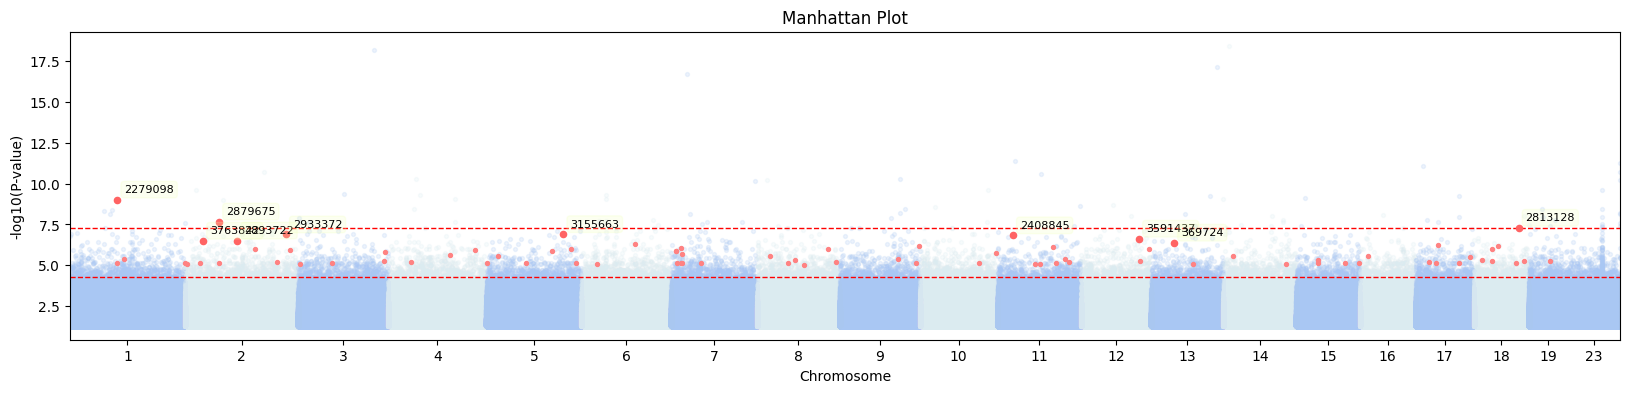

In [38]:
plot_manhattan(df, highlight_ids=highlight_ids, overlap_ids=overlap_ids)